# STAT 207 Lab 6 - Individual Part - [25 total points]

## Hypothesis Testing and Z-Scores

Due: Tuesday, October 5 11:59pm CST



## <u>Case Studies</u>: U.S. County Unemployment Rate and Median Education Levels
In this lab we will explore the statistical concepts that we've learned this week while also examining the **unemployment rates** and the **median education levels** of the counties in the U.S.

**We will be expanding upon results that we discovered in lab_05_individual.ipynb. Thus, referencing your code and analyses from this lab_05 and the solutions (which are now posted) will be useful!**

### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1. [0.25 pt] Data Processing and Cleaning

We will be analyzing the same two variables that we did in lab_05_individual.ipynb. So you can re-use the same code as before.

1. Read the county.csv into a dataframe, call it df, and display the first five rows.
 - *This dataset has missing values! Specifically, the phrase 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.*
2. Create a pandas dataframe that is comprised of just the unemployment rate and the median_edu columns. Then drop all rows in this dataframe that have missing values.

In [3]:
df = pd.read_csv('county.csv', na_values=['data unavailable'])
df.head(5)

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


In [4]:
new_df = df[['unemployment_rate', 'median_edu']].dropna()
new_df

,unemployment_rate,median_edu
0,3.86,some_college
1,3.99,some_college
2,5.90,hs_diploma
3,4.39,hs_diploma
4,4.02,hs_diploma
...,...,...
3137,4.55,some_college
3138,2.99,bachelors
3139,4.50,some_college
3140,4.08,some_college


## 2. Curating Information about the Population Distribution, Sample Distribution, and Sampling Distribution

All of the questions that we are asking below in #2 has already been done in lab_05_individual. We will use all of this information in questions #3-#5. So we will just organize all of our needed information here in #2 first. Again, we will assume that this cleaned dataframe of 3139 U.S. counties is our **population**.

<hr>

### Tutorial/Review: Mean and Standard Deviation
Whenever someone says "mean" or "standard deviation" in statistics, you should always be ready to ask: "the 'mean' or 'standard deviation' *of what*?". 

Depending on what set of numerical values that we're looking at (or would be theoretically looking at in the case of a sampling distribution), your 'mean' and 'standard deviation' will be different.
<hr>

### 2.1. [0.25 pt] Collect a random sample
Collect a random sample of 50 counties from the population without replacement. Use a random state of 101.

This is the same random sample of 50 counties that we collected in lab_05.



In [5]:
sample = df.sample(50, random_state=101)
sample

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
2055,Clermont County,Ohio,177977.0,197363,204214.0,1.93,9.8,77.1,18.9,4.38,yes,some_college,31423.95,64183.0,NaN
2369,Buffalo County,South Dakota,2032.0,1912,1999.0,-1.28,40.5,28.6,11.2,7.54,no,hs_diploma,10466.84,30500.0,none
104,Mohave County,Arizona,155032.0,200186,207200.0,2.06,18.6,71.5,9.8,5.86,yes,hs_diploma,23135.98,41567.0,NaN
1450,Neshoba County,Mississippi,28684.0,29676,29369.0,-0.46,22.1,76.2,6.5,5.08,no,hs_diploma,19071.00,36755.0,none
1413,Clay County,Mississippi,21979.0,20634,19640.0,-3.47,26.6,71.5,8.7,6.75,no,hs_diploma,18682.88,34118.0,none
536,Washington County,Georgia,21176.0,21187,20313.0,-1.28,27.1,71.8,5.7,6.01,no,hs_diploma,20184.65,38097.0,none
2258,Chester County,Pennsylvania,433501.0,498886,519293.0,1.94,6.9,77.1,18.4,3.59,yes,bachelors,46758.87,92417.0,none
742,LaPorte County,Indiana,110106.0,111467,110029.0,-1.24,16.6,75.4,16.5,4.47,yes,hs_diploma,27226.89,49921.0,NaN
6,Butler County,Alabama,21399.0,20947,19825.0,-2.69,24.4,69.0,13.7,5.49,no,hs_diploma,17014.95,36326.0,NaN
2450,Dyer County,Tennessee,37279.0,38335,37463.0,-1.64,18.1,65.0,17.0,4.84,no,hs_diploma,24957.20,44386.0,none


## 2.2. Population Distribution of Unemployment Rates

#### 2.2.1 [0.25 pt] Mean and Standard Deviation

What is the mean and standard deviation unemployment rate of the population?

In [6]:
pop_mean = df['unemployment_rate'].mean()
pop_mean

4.611443134756305

In [7]:
pop_std = df['unemployment_rate'].std()
pop_std

1.6487610856225392

#### 2.2.2 [0.25 pt] Distribution Shape
Plot a histogram for the population of unemployment rates.

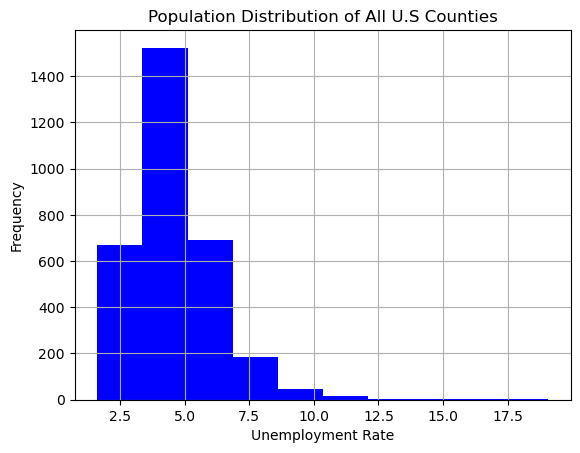

In [8]:
df['unemployment_rate'].hist(color = 'blue')
plt.title('Population Distribution of All U.S Counties')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

### 2.3. Sample Distribution of Unemployment Rates

#### 2.3.1 [0.25 pt] Mean and Standard Deviation

What is the mean and standard deviation of this sample distribution of unemployment rates?

In [79]:
sample = new_df['unemployment_rate'].sample(50, random_state=101, replace = False)
sample_mean = sample.mean()
sample_mean

5.0280000000000005

In [80]:
sample_std = sample.std()
sample_std

1.598841417261581

#### 2.3.2. [0.25 pt] Distribution Shape

Plot the distribution for the sample of unemployment rates.

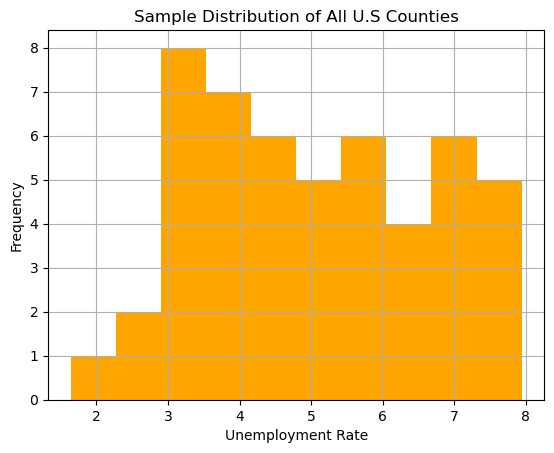

In [81]:
sample.hist(color = 'orange')
plt.title('Sample Distribution of All U.S Counties')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

### 2.4. Sampling Distribution of Sample Mean Unemployment Rates

#### 2.4.1. [0.25 pt] Mean and Standard Deviation

What is the mean and standard deviation of the sampling distribution of sample mean unemployment rates (where all of the samples are of size n=50)?

In [82]:
sample_dist_mean = pop_mean
sample_dist_mean

4.611443134756305

In [83]:
sample_dist_std = pop_std / np.sqrt(50)
sample_dist_std

0.23317002884003826

#### 2.4.2. [0.25 pt] Normality of the Sampling Distribution of Sample Means?

Is this sampling distribution of sample mean unemployment rates normal? Why or why not?

Yes because the central limit theorem conditons for sample means hold:
1. The sample is randomly selected
2. The sample size n=50 < 10% of the population size.
3. The sample size n=50 > 30

## 3. Z-Scores

<hr>

### <u>Tutorial/Review</u>

The **z-score** of a given observation = $\frac{(\mbox{observation}) - (\mbox{mean of the distribution this observation was drawn from})}{(\mbox{standard deviation of the distribution this observation was drawn from})}$.

Thus, when someone says "take the z-score of (some value)" in statistics, you should always ask "what distribution did this 'value' come from?". Depending on the *distribution* that you're talking about (ie. population distribution vs. sampling distribution), the mean and standard deviation of this distribution will be different. And thus, the mean and standard deviation that you use in the z-score equation will be different.

<hr>

### 3.1. [1 pt] z-score of an Observation from the Population

The unemployment rate of Champaign county in Illinois is 4.24. Calculate the z-score of Champaign county's unemployment rate.


In [84]:
champaign = df[df['name'] == 'Champaign County']
cu_mean = champaign['unemployment_rate'].mean()
cu_std = champaign['unemployment_rate'].std()
z_score = (4.24 - cu_mean) / cu_std
z_score

0.7071067811865476

### 3.2. [1 pt] z-score of an Observation from the Sampling Distribution of Sample Mean Unemployment Rates

Calculate the z-score of the sample mean unemployment rate that we calculated in 2.3.1.


In [85]:
z_score_sample = (4.24 - sample_mean) / (sample_std/np.sqrt(50))
z_score_sample

-3.485024453077688

### 3.3. [1 pt] Z-score Probability

Then calculate the probability a z-score is greater than or equal to this z-score that you calculated in 3.2.

In [86]:
from scipy.stats import norm
1 - norm.cdf(sample_mean, loc = sample_dist_mean, scale = sample_dist_std)

0.03700965123991118

## 4. Hypothesis Testing on the Mean Unemployment Rate of all U.S. Counties

Next, we will assume that we do not have access to the population of U.S. counties. Suppose that a local politician is making a claim that the unemployment rate of Champaign county, Illinois is representative of what we might expect to see of all U.S. counties on average. Specifically, they claim that the average unemployment rate of all U.S. counties is equal to 4.24. As Champaign county residents, we are skeptical of this claim and would like to test it, using the random sample of 50 U.S. counties that we collected in 2.1. We will use both a p-value and a confidence interval to evaluate these claims.

**In #4, you should now assume that you *do not know* what the population mean unemployment rate is or the population standard deviation unemployment rate is.**

### 4.1. [1 pt] Hypotheses

First, set up your null and alternative hypotheses to evaluate these claims. You should use the appropriate notation to write these hypotheses. For any population parameter terms that you use, you should define what this parameter refers to.

H0 : The average unemployment rate of all U.S counties is equal to 4.24 (μ = 4.24)
HA : The average unemployment rate of all U.S counties is not equal to 4.24 (μ != 4.24)

### 4.2. [0.5 pt] Check conditions

Check the appropriate conditions for conducting this hypothesis test.

1. The sample is randomly collected
2. n = 50 < 10% of all U.S counties
3. n = 50 > 30.

### 4.3. [3 pt] Calculate the p-value

Calculate the p-value for this hypothesis test.

In [87]:
error_std = pop_std / np.sqrt(50)
test_stat = (sample_mean - 4.24) / error_std
test_stat

3.3795080951016745

In [88]:
p_value = 2 * (1 - norm.cdf(sample_mean, loc = 4.24, scale = error_std))
p_value

0.0007261566885956583

### 4.4. [1 pt] Conclusion with p-value
Make a conclusion about your hypotheses using a significance level of $\alpha=0.05$.

Because the p_value = 0.0007 < $\alpha=0.05$, we reject the null hypothesis. We have sufficient evidence to suggest that there is an association between unemployment rates and U.S counties.

### 4.5. [2 pt] Confidence Interval

Next, create a 95% confidence interval for the average unemployment rate of all U.S. counties.

In [99]:
alpha = 0.05
critical_value = norm.ppf(1 - alpha/2)
critical_value

1.959963984540054

In [100]:
lower_bound = sample_mean - critical_value * (sample_std / np.sqrt(50))
upper_bound = sample_mean + critical_value * (sample_std / np.sqrt(50))
print(lower_bound,",",upper_bound)

4.5848319130577035 , 5.471168086942297


### 4.6. [1 pt] Confidence Interval Conclusion

Make a conclusion about your hypotheses using your 95% confidence interval.

Because 4.24 is outside the confidence interval, we reject the null hypothesis. Thus, we can say that we have enough evidence to suggest the alternative hypothesis.

## 5. Hypothesis Testing on the Proportion of all U.S. Counties that Have Median Education Level of 'Some College'.

In #5, we will similarly assume that we do not have access to the population of U.S. counties. Suppose that a local politician is further claiming that exactly half of all U.S. counties have a median education level of some college. We are skeptical of this claim as well and would like to test it with a new random sample which we will draw from the population of U.S. counties in 5.2 below. We will use both a p-value and a confidence interval to evaluate these claims.

**In #5, you should now assume that you *do not know* what the population proportion of counties whose median education level is some college is.**

### 5.1. [1 pt] Hypotheses

First, set up your null and alternative hypotheses to evaluate these claims. You should use the appropriate notation to write these hypotheses. For any population parameter terms that you use, you should define what this parameter refers to.

H0 : Exactly half of all U.S counties have a median education level of some college.
HA : Not exactly half of all U.S counties have a median education level of some college.

### 5.2.  [1 pt]  Random Sample and Sample Proportion

Collect a random sample of 40 county median education levels from the population, using a random state of 101. Then calculate the proportion of counties in this sample that have a median education level of some college.

*Hint: This is the same sample that you collected in 4.2.1 of lab_05_individual.*

In [92]:
edu_sample = new_df.sample(40, random_state=101, replace=False)
edu_sample

,unemployment_rate,median_edu
1294,7.15,some_college
960,3.33,some_college
105,7.57,some_college
692,4.73,some_college
502,5.28,hs_diploma
1824,7.94,some_college
335,4.14,some_college
2510,2.96,some_college
6,5.49,hs_diploma
649,4.88,some_college


In [93]:
edu_prop = edu_sample[edu_sample['median_edu'] == 'some_college'].shape[0]/edu_sample.shape[0]
edu_prop

0.525

### 5.3.  [1.5 pt]  Check Conditions 

Check the appropriate conditions for conducting this hypothesis test.

1. The sample size is randomly selected.
2. The sample size n = 40 < 10% of the population size.
3. np = 40 * 0.525 >= 10 AND n(1-p) = 40 * (1-0.525) >= 10

### 5.4.  [3 pt]  p-value

Calculate the p-value for this hypothesis test.

In [94]:
std = np.sqrt(edu_prop * (1 - edu_prop) / 40)
std

0.07895805848676878

In [95]:
test_stat = (0.525 - 0.5) / std
test_stat

0.31662379343065206

In [96]:
pvalue = 2 * (1 - norm.cdf(np.abs(test_stat)))
pvalue

0.7515290794442089

### 5.5.  [1 pt]  Conclusion with p-value

Use your p-value and a significance level of $\alpha=0.10$ to make a conclusion about your hypotheses.

Because our p-value is 0.752 > $\alpha=0.10$, we fail to reject the null hypothesis. We don't have sufficient evidence to suggest that exactly half of all U.S counties have a median education level of "some college".

### 5.6.  [3 pt]  Confidence Interval

Construct a 90% confidence interval for the proportion of all U.S. counties that have a median education level of some college.

In [97]:
critical_val = norm.ppf(0.90)
std_error = np.sqrt(edu_prop * (1 - edu_prop) / 40)
print(critical_val)
print(std_error)

1.2815515655446004
0.07895805848676878


In [98]:
lower = edu_prop - critical_val * std_error
upper = edu_prop + critical_val * std_error
print(lower, ",", upper)

0.42381117653391936 , 0.6261888234660806


### 5.7.  [1 pt]  Confidence Interval Conclusion

Make a conclusion about your hypotheses with your confidence interval.

Because the null value (0.525) is in the confidence interval range, we fail to reject the null hypothesis. Thuse we have sufficient evidence to suggest that the proprotion of U.S counties with a median education of "some college" is not exactly half.